## Homework

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

In [1]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip


--2024-10-14 19:02:16--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.4’

bank+marketing.zip.     [    <=>             ] 999,85K  1,47MB/s    in 0,7s    

2024-10-14 19:02:18 (1,47 MB/s) - ‘bank+marketing.zip.4’ saved [1023843]



We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not.

### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

In [2]:
!unzip -o bank+marketing.zip && unzip -o bank.zip && unzip -o bank-additional.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           


  inflating: bank-names.txt          
  inflating: bank.csv                
Archive:  bank-additional.zip
  inflating: bank-additional/.DS_Store  
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [3]:
import pandas as pd

column_list = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

df = pd.read_csv("bank-full.csv", delimiter=";")
df = df[column_list]
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary`
- `tertiary`


In [5]:
df['education'].mode()

0    secondary
Name: education, dtype: object

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`

In [6]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[num_columns].corr()

print(corr_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


<Axes: >

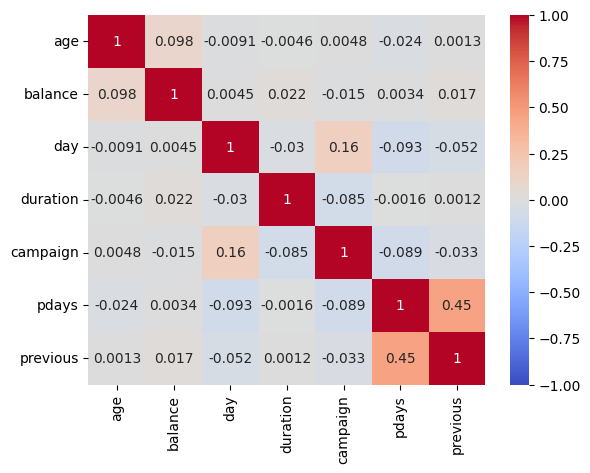

In [7]:
# plot using sns
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)



R/ pdays and previous

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [8]:
df["y"] = df.y.replace({"yes": 1, "no": 0})

df["y"]

/tmp/ipykernel_1100760/3956235404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["y"] = df.y.replace({"yes": 1, "no": 0})


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [9]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop('y')

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the train+validation set into train and validation sets (75% / 25%, which is 60% / 20% of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Train set shape: (27126, 14)
Validation set shape: (9042, 14)
Test set shape: (9043, 14)


### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `contact`
- `education`
- `housing`
- `poutcome`


In [10]:
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import LabelEncoder

categorical_columns = X_train.select_dtypes(include=['object']).columns

#@ DEFINING FUNCTION:
def calculate_mi(series):
    score = mutual_info_score(series, y_train)
    score = round(score, 2)
    return score

#@ IMPLEMENTATION:
df_mi = X_train[categorical_columns].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi


,MI
month,0.03
poutcome,0.03
job,0.01
housing,0.01
contact,0.01
marital,0.00
education,0.00


R/ poutcome

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9

In [11]:
X_train.columns


Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [12]:
from sklearn.feature_extraction import DictVectorizer


dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
X_train_dv = dv.fit_transform(train_dict)

X_train_dv


array([[3.200e+01, 1.100e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.800e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.900e+01, 3.309e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [5.400e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.500e+01, 2.311e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+01, 1.500e+01, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [13]:
val_dict = X_val.to_dict(orient='records')
X_val_dv = dv.fit_transform(val_dict)

In [14]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_dv, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [15]:
y_pred = model.predict(X_val_dv)



0.9009068790090687

In [20]:
model_accuracy = model.score(X_val_dv, y_val)
model_accuracy

0.9009068790090687

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
accuracy = round(accuracy, 2)

print(f"Validation accuracy: {accuracy}")

Validation accuracy: 0.9


### Question 5

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.


In [18]:
feature_list = X_train.columns.tolist()
accuracy_differences = []

for feature in feature_list:
    column_list = [col for col in feature_list if col != feature]

    X_train_short = X_train[column_list]
    X_val_short = X_val[column_list]

    train_dict_short = X_train_short.to_dict(orient='records')
    val_dict_short = X_val_short.to_dict(orient='records')

    dv_short = DictVectorizer(sparse=False)
    X_train_dv_short = dv_short.fit_transform(train_dict_short)
    X_val_dv_short = dv_short.transform(val_dict_short)

    model_short = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_short.fit(X_train_dv_short, y_train)

    accuracy_short = model_short.score(X_val_dv_short, y_val)

    accuracy_differences.append((feature, accuracy_short))

In [19]:
accuracy_differences

[('age', 0.9013492590134926),
 ('job', 0.9011280690112807),
 ('marital', 0.9009068790090687),
 ('education', 0.9009068790090687),
 ('balance', 0.9010174740101747),
 ('housing', 0.9011280690112807),
 ('contact', 0.900464499004645),
 ('day', 0.9013492590134926),
 ('month', 0.8998009289980093),
 ('duration', 0.8897367838973679),
 ('campaign', 0.9002433090024331),
 ('pdays', 0.9009068790090687),
 ('previous', 0.9009068790090687),
 ('poutcome', 0.8933864189338642)]

In [24]:
min_accuracy_label = ''
min_accuracy_score = 1


for measure in accuracy_differences:
    diff = model_accuracy - measure[1]

    if abs(diff) < min_accuracy_score:
        min_accuracy_label = measure[0]
        min_accuracy_score = diff


print(min_accuracy_label, min_accuracy_score)

age -0.00044238000442387015


### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0, 0.01, 0.1, 1, 10]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [29]:
C_list = [0.01, 0.1, 1, 10, 100]

accuracy_differences = []

for C in C_list:
    model_reg = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model_reg.fit(X_train_dv, y_train)

    accuracy_score_reg = model_reg.score(X_val_dv, y_val)
    accuracy_score_reg = round(accuracy_score_reg, 3)

    accuracy_differences.append((C, accuracy_score_reg))

accuracy_differences

[(0.01, 0.898), (0.1, 0.901), (1, 0.901), (10, 0.901), (100, 0.901)]

R/ 0.1

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw03
* If your answer doesn't match options exactly, select the closest one
